# SLiCAP Quick Start in Jupyter

A quick introduction to using SLiCAP in Jupyter notebooks.

In [1]:
# Import and initialize
from SLiCAP import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

initProject("Quick Start")
print("✓ Ready!")

Compiling library: SLiCAP.lib.
Compiling library: SLiCAPmodels.lib.
✓ Ready!


## Voltage Divider

In [2]:
# Load and analyze
cir = makeCircuit('voltage_divider.cir')
cir.defPar('R1', 1000)
cir.defPar('R2', 2000)
cir.defPar('V_in', 10)

result = doLaplace(cir, source='V1', detector='V_out')

print("Transfer function:")
display(result.laplace)

# Calculate output
dc_gain = result.laplace.subs([('R1', 1000), ('R2', 2000)])
v_out = 10 * float(dc_gain)
print(f"\nV_out = {v_out:.3f} V")

Checking netlist: cir/voltage_divider.cir
Transfer function:


R2/(R1 + R2)


V_out = 6.667 V


## RC Filter with Frequency Response

In [3]:
# Load circuit
cir_rc = makeCircuit('rc_lowpass.cir')
cir_rc.defPar('R', 1000)
cir_rc.defPar('C', 100e-9)
cir_rc.defPar('V_in', 1)

result_rc = doLaplace(cir_rc, source='V1', detector='V_out')

print("Transfer function:")
display(result_rc.laplace)

Checking netlist: cir/rc_lowpass.cir
Transfer function:


1/(C*R*s + 1)

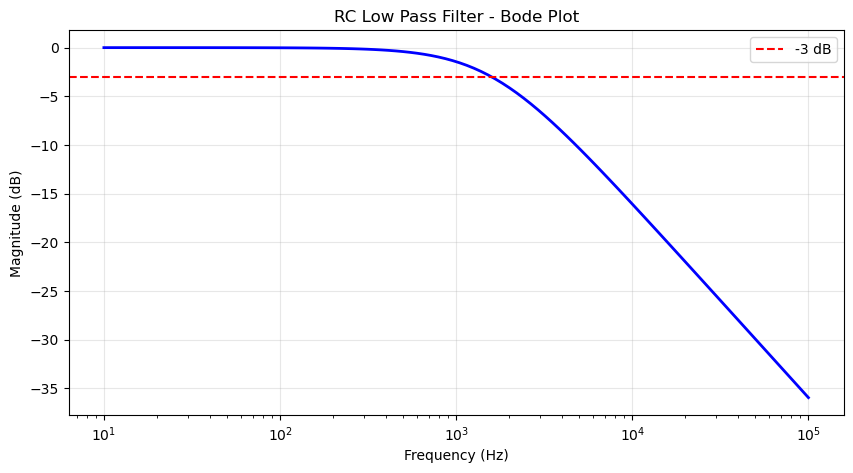

In [4]:
# Quick frequency response plot
freqs = np.logspace(1, 5, 100)
H = result_rc.laplace

mag_dB = []
for f in freqs:
    omega = 2*np.pi*f
    H_val = H.subs([('R', 1000), ('C', 100e-9), ('s', 1j*omega)])
    mag_dB.append(20*np.log10(abs(complex(H_val))))

plt.figure(figsize=(10, 5))
plt.semilogx(freqs, mag_dB, 'b-', linewidth=2)
plt.axhline(-3, color='r', linestyle='--', label='-3 dB')
plt.grid(True, alpha=0.3)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude (dB)')
plt.title('RC Low Pass Filter - Bode Plot')
plt.legend()
plt.show()

## Display Schematic

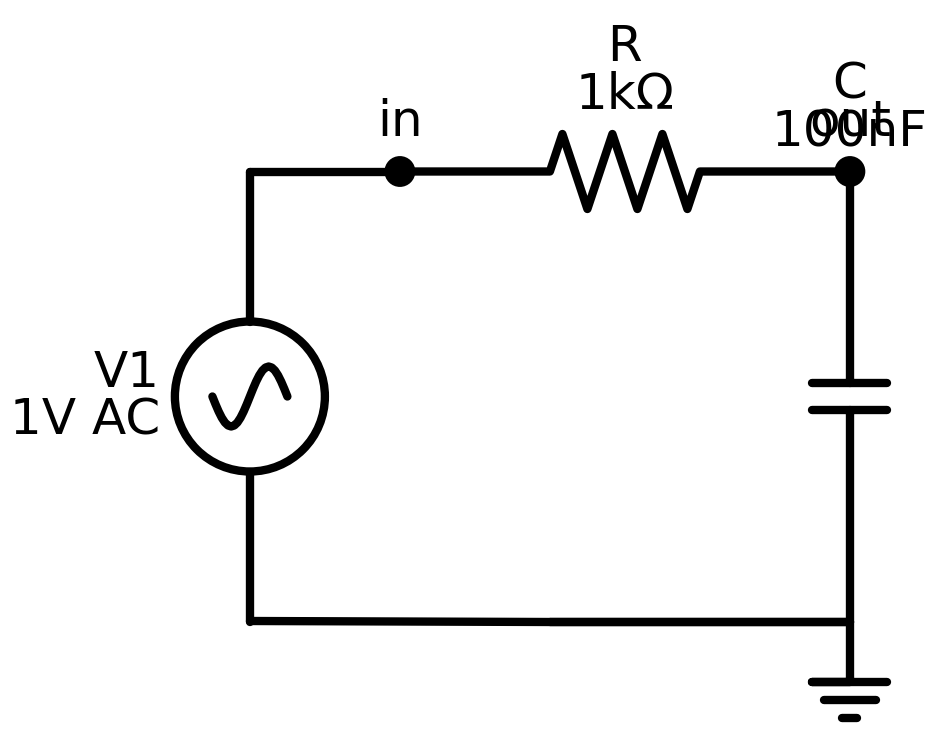

In [5]:
from IPython.display import Image
Image('img/rc_lowpass_schematic.png', width=400)